## Fingerprints

In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

RDKit WARNING: [12:11:33] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
#Load data
df_can = pd.read_csv('cannabinoid.csv', delimiter=';')

In [3]:
#Clean data
df1 = df_can.dropna(subset=['Smiles'])

In [4]:
#List of molecules instances
ligandm_database = []
for ligand in df1["Smiles"]:
		ligandm_database.append(Chem.MolFromSmiles(ligand))

In [5]:
#Load drugbank data
drugbank = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in drugbank if m]

In [9]:
# ECFP - citric acid
mol = Chem.MolFromSmiles('CC(=O)O')
fngpnt = Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
fngpnt

In [10]:
#Bit values to string
fngpnt.ToBitString()

'000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [15]:
#ECP for my dataset
can_ecfp = []
for ligand in ligandm_database:
	can_ecfp.append(Chem.GetMorganFingerprintAsBitVect(ligand, 2, nBits=1024))

In [16]:
#ECP for drugbank
drug_ecfp = []
for ligand in drugs:
	drug_ecfp.append(Chem.GetMorganFingerprintAsBitVect(ligand, 2, nBits=1024))

In [17]:
#List of zeros of given lenght
can_ecfp_sums = [0]*can_ecfp[0].GetNumBits() 
for key in can_ecfp:
    for onbit in key.GetOnBits():
        can_ecfp_sums[onbit] += 1
can_ecfp_sums

[40,
 570,
 441,
 203,
 797,
 54,
 6,
 72,
 167,
 107,
 93,
 78,
 15,
 171,
 64,
 626,
 26,
 33,
 34,
 133,
 28,
 97,
 68,
 66,
 90,
 104,
 69,
 26,
 7,
 202,
 30,
 69,
 38,
 1976,
 70,
 21,
 557,
 21,
 82,
 131,
 95,
 119,
 185,
 47,
 12,
 195,
 1021,
 30,
 31,
 35,
 30,
 27,
 22,
 408,
 22,
 47,
 363,
 25,
 74,
 55,
 21,
 204,
 214,
 199,
 1650,
 146,
 21,
 107,
 31,
 29,
 20,
 39,
 66,
 124,
 78,
 169,
 17,
 123,
 23,
 170,
 1724,
 75,
 27,
 34,
 110,
 23,
 30,
 39,
 47,
 33,
 452,
 15,
 48,
 14,
 142,
 102,
 56,
 121,
 18,
 29,
 16,
 23,
 237,
 10,
 71,
 47,
 58,
 51,
 37,
 39,
 77,
 22,
 240,
 116,
 615,
 56,
 87,
 240,
 66,
 295,
 34,
 344,
 26,
 61,
 34,
 39,
 23,
 105,
 1797,
 49,
 225,
 43,
 35,
 115,
 115,
 12,
 1050,
 18,
 301,
 156,
 252,
 32,
 22,
 48,
 57,
 84,
 30,
 419,
 19,
 20,
 22,
 119,
 30,
 9,
 15,
 33,
 9,
 147,
 56,
 22,
 84,
 24,
 265,
 26,
 38,
 536,
 22,
 16,
 20,
 54,
 49,
 104,
 70,
 25,
 30,
 1196,
 22,
 57,
 21,
 28,
 49,
 36,
 43,
 86,
 242,
 437,
 31,
 

In [19]:
#List of zeros of given lenght
drugs_ecfp_sums = [0]*drug_ecfp[0].GetNumBits() # a list of zeros of a given length
for key in drug_ecfp:
    for onbit in key.GetOnBits():
        drugs_ecfp_sums[onbit] += 1
drugs_ecfp_sums

[120,
 2360,
 285,
 317,
 939,
 231,
 29,
 138,
 213,
 303,
 260,
 258,
 68,
 665,
 227,
 828,
 103,
 104,
 93,
 187,
 118,
 203,
 63,
 237,
 153,
 162,
 127,
 111,
 62,
 211,
 69,
 172,
 158,
 4264,
 155,
 111,
 1076,
 73,
 87,
 207,
 79,
 440,
 648,
 112,
 78,
 261,
 319,
 76,
 52,
 97,
 89,
 123,
 245,
 271,
 100,
 63,
 105,
 85,
 158,
 178,
 69,
 179,
 204,
 219,
 2683,
 147,
 55,
 173,
 97,
 226,
 76,
 345,
 179,
 388,
 255,
 465,
 76,
 283,
 134,
 479,
 4939,
 169,
 152,
 122,
 313,
 87,
 270,
 124,
 107,
 105,
 1541,
 90,
 160,
 54,
 308,
 97,
 114,
 158,
 96,
 87,
 61,
 119,
 402,
 60,
 194,
 160,
 246,
 79,
 173,
 84,
 162,
 73,
 534,
 56,
 797,
 155,
 395,
 608,
 349,
 767,
 78,
 767,
 118,
 165,
 82,
 193,
 109,
 47,
 2503,
 89,
 337,
 123,
 98,
 162,
 127,
 52,
 625,
 56,
 515,
 399,
 667,
 59,
 125,
 150,
 289,
 198,
 99,
 2457,
 87,
 79,
 106,
 104,
 370,
 64,
 67,
 126,
 66,
 183,
 282,
 48,
 160,
 45,
 232,
 135,
 134,
 262,
 107,
 98,
 73,
 96,
 129,
 261,
 137,
 202,


In [29]:
#Getting number between 0 and 1 in my dataset

can_ecfp_scaled = []
for x in can_ecfp_sums:
    y = x/len(can_ecfp)
    can_ecfp_scaled.append(y)


In [31]:
#Getting number between 0 and 1 in my dataset

drugs_ecfp_scaled = []
for x in drugs_ecfp_sums:
    y = x/len(drug_ecfp)
    drugs_ecfp_scaled.append(y)
drugs_ecfp_scaled

[0.01687051876845213,
 0.3317868691128919,
 0.04006748207507381,
 0.044566287079994375,
 0.13201180936313792,
 0.03247574862927035,
 0.004077042035709265,
 0.01940109658371995,
 0.029945170814002532,
 0.04259805989034163,
 0.036552790664979615,
 0.036271615352172076,
 0.009559960635456208,
 0.09349079150850555,
 0.03191339800365528,
 0.1164065795023197,
 0.014480528609588077,
 0.014621116265991847,
 0.013074652045550401,
 0.026289891747504568,
 0.016589343455644594,
 0.028539294249964854,
 0.008857022353437369,
 0.03331927456769296,
 0.021509911429776464,
 0.022775200337410376,
 0.017854632363278503,
 0.01560522986081822,
 0.008716434697033601,
 0.029663995501194994,
 0.009700548291859975,
 0.024181076901448054,
 0.022212849711795303,
 0.5994657669056657,
 0.021791086742584002,
 0.01560522986081822,
 0.1512723182904541,
 0.010262898917475045,
 0.012231126107127795,
 0.029101644875579924,
 0.011106424855897652,
 0.06185856881765781,
 0.0911008013496415,
 0.015745817517221986,
 0.0109658

In [65]:
#The differences between my dataset and drugbank

can_drugbank_differences = [(i, a_b[0] - a_b[1])
                             for i, a_b in enumerate(zip(can_ecfp_scaled, drugs_ecfp_scaled))]
can_drugbank_differences.sort(key=lambda x: x[1])
can_drugbank_differences[:5], can_drugbank_differences[-5:]

([(147, -0.20566403189079518),
  (389, -0.1426326487680479),
  (1, -0.14166011794544695),
  (80, -0.11931240162263856),
  (786, -0.10252943360618968)],
 [(46, 0.29571291118958637),
  (816, 0.33837019796786594),
  (216, 0.3517176313333965),
  (659, 0.3585023691224113),
  (561, 0.36425806904213853)])

In [75]:
# Ethanol ECFP
bitinfo = {} 
ethanol = Chem.MolFromSmiles("CCO")
fp = Chem.GetMorganFingerprintAsBitVect(ethanol, 2, nBits=1024, bitInfo=bitinfo)
list(fp.GetOnBits()), bitinfo

([33, 80, 222, 294, 386, 807],
 {33: ((0, 0),),
  80: ((1, 0),),
  222: ((2, 1),),
  294: ((0, 1),),
  386: ((1, 1),),
  807: ((2, 0),)})

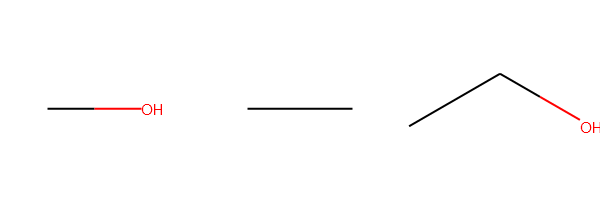

In [76]:
submols = []
for bit, atom_radius in bitinfo.items():
    atom, radius = atom_radius[0]
    if radius == 0: 
        continue
    hit_atoms = Chem.FindAtomEnvironmentOfRadiusN(ethanol, radius, atom)
    submols.append(Chem.PathToSubmol(ethanol, hit_atoms))
Draw.MolsToGridImage(submols)

In [77]:
def substructures_of_bit_ecfp4_1024(mol, bit):
    bitinfo = {}
    Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, bitInfo=bitinfo)
    hit_atoms = [Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atom)
                 for atom, radius in bitinfo.get(bit, [])
                 if radius > 0]
    submols = [Chem.PathToSubmol(mol, ha) for ha in hit_atoms]
    return submols

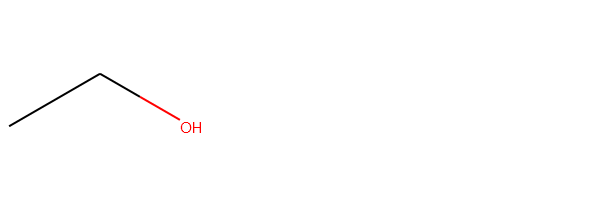

In [78]:
Draw.MolsToGridImage(substructures_of_bit_ecfp4_1024(ethanol, 386))

In [82]:
#Frequent bit 561 in my dataset - find out fragments
substructure_smiles = {}
for ligand in ligandm_database:
    for submol in substructures_of_bit_ecfp4_1024(ligand, 561):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles[subsmiles] = substructure_smiles.get(subsmiles, 0) + 1
substructure_smiles

{'cCl': 2564,
 'cc(c)Sc(c)c': 26,
 'cc(C)cc(c)O': 4,
 'CCl': 4,
 'ccc(-c(c)c)c(c)-c': 4,
 'CSCC(C)C': 1,
 'ccc(C)c(c)N': 2,
 'ccc(cc)C(C)C': 2,
 'cc(c)/C=C/C': 1,
 'ccn(c(c)-c)c(c)n': 1}

10 distinct fragments map the 561 bit in my dataset. The most prevalent is cCl, then is cc(c)Sc(c)c, 'cc(C)cc(c)O' etc.


In [83]:
# bit 561 - find out distinct fragments in drugbank dataset
substructure_smiles_db = {}
for drug in drugs:
    for submol in substructures_of_bit_ecfp4_1024(drug, 561):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles_db[subsmiles] = substructure_smiles_db.get(subsmiles, 0) + 1
substructure_smiles_db

{'cCl': 873,
 'ccc(-c(c)c)c(c)-c': 8,
 'ccc(C)c(c)N': 1,
 'cc(c)Sc(c)c': 36,
 'ccsc(n)[NH3+]': 1,
 'cc(c)/C=C/C': 3,
 'CCl': 6,
 'N=c([nH])n': 8,
 'cc(C)cc(c)O': 15,
 'CCC(C)C(C)O': 1,
 'CSCC(C)C': 1,
 'ccc(cc)C(C)C': 4,
 'cC[C@H](Oc)C(C)(C)O': 1,
 'C=C[C@@H](O)C(C)C': 1,
 'ccn(c(c)-c)c(c)n': 2,
 'CC(C)C(=O)N(c)C': 1,
 'COC(C(C)C)C(C)C': 1,
 '[O-][Cl+3]([O-])([O-])[O-]': 1,
 'C=NOCC': 1,
 'ccc(Cl)c(n)O': 1,
 'CO[P@](=O)(O)[C@@H](C)N': 1,
 'CCC(=O)CP': 1,
 'cc(-c)c(C#N)c(n)N': 1,
 'CCO[Pt](N)(N)O': 1}

In [81]:
len(substructure_smiles_db)

24

In drugbank there are 24 fragments that map onto 561 bit in drugbank dataset. The most occuring one is cCL, then is cc(c)Sc(c)c and cc(C)cc(c)O. 

To sum up, the most prevelant fragment in 561 bit in my dataset is cCL. However, it is also ocurring in drugbank but in lower prevelance. DrugBank maps many fragments to 561, however with lower prevelance than in my dataset